In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import gensim
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from sklearn.metrics.pairwise import cosine_similarity
import os
from gensim.models import Word2Vec

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.6 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IIMB/Original_cleaned_lemmatized_data.csv')

In [ ]:
df.head()

,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...


In [ ]:
df.drop(['Unnamed: 0'],axis=1)

,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop
0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...
1,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...
2,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...
3,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...
4,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...
...,...,...,...,...,...,...
9169,Zoe Christian Center,Additional Info About Our Church This is the ...,Pentecostal Churches,our church this is the ministry of christ jesu...,ministry christ jesus place develop walk chris...,ministry christ jesus place develop walk chris...
9170,Zoe Christian Fellowship,Additional Info About Our Church Countless nu...,Other Churches,our church countless numbers of people have be...,countless numbers people impacted powerful pro...,countless numbers people impacted powerful pro...
9171,Zionsville Presbyterian Church,Additional Info About Our Church Welcome to Z...,Presbyterian Churches,our church welcome to zpc where our focus is s...,welcome zpc focus simple live love jesus help ...,welcome zpc focus simple live love jesus help ...
9172,Zoe Life Christian Center,Additional Info About Our Church We are a min...,Other Churches,our church we are a ministry dedicated to meet...,ministry dedicated meeting needs lost believer...,ministry dedicated meeting needs lost believer...


**Tokenizing and Finding N-grams**





In [ ]:
# TOKENIZE
data = list(df['tidy_details_no_stop'])
data2 = list(df['lem_tidy_details_no_stop'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
data_words_2 = list(sent_to_words(data2))

In [ ]:
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

**Building  Word2Vec Model**

In [ ]:
df = df.dropna()

In [ ]:
documents = []
for detail in data_words:
    documents.append(detail)

In [ ]:
for detail in data_bigrams:
    sent = ' '.join(detail)
    if '_' in sent:
        documents.append(detail)

for detail in data_bigrams_trigrams:
    sent = ' '.join(detail)
    if '_' in sent:
        documents.append(detail)

In [ ]:
# Training the Word2Vec model
model = Word2Vec(documents, #Word list
                   min_count=5, #Ignore all words with total frequency lower than this
                   workers=4, #Number of CPUs
                   vector_size=100,  #Embedding size
                   window=5, #Maximum Distance between current and predicted word
                   seed=2
                  # iter=10   #Number of iterations over the text corpus
                  )

In [ ]:
model.wv.vectors.shape

(10080, 100)

In [ ]:
all_words = model.wv.index_to_key              #key_to_index
top_words = model.wv.index_to_key[0:5]
top_words

['church', 'god', 'mission', 'people', 'christ']

In [ ]:
print('Vocabulary size: %d' % len(all_words))

Vocabulary size: 10080


In [ ]:
similar = model.wv.most_similar('mass', topn=50)
print(similar)

[('first_sunday_month', 0.9259501099586487), ('lords_day', 0.9219463467597961), ('thursday', 0.9106687903404236), ('celebrated', 0.9100208878517151), ('pm', 0.9075753092765808), ('thursdays', 0.9011303782463074), ('sunday_month', 0.901054322719574), ('eve', 0.9010488390922546), ('holy_communion', 0.9007557034492493), ('friday', 0.8985981941223145), ('month', 0.8967188000679016), ('easter', 0.8943572640419006), ('evening', 0.8939893245697021), ('traditional_hymns', 0.8937207460403442), ('saturday', 0.8914775252342224), ('christmas', 0.8895764946937561), ('morning', 0.8885656595230103), ('piano', 0.888338029384613), ('weekly_communion', 0.888270378112793), ('offered', 0.8862955570220947), ('maundy', 0.8858298659324646), ('celebrations', 0.8857176899909973), ('restricted', 0.8855170011520386), ('cappella', 0.885431706905365), ('wednesday', 0.8844796419143677), ('held', 0.8821707963943481), ('altar_call', 0.8816482424736023), ('readings', 0.8791763186454773), ('english', 0.8791566491127014

In [ ]:
model.save("/content/drive/MyDrive/IIMB/word2vec_church Classification 2")

**Visualizing Distribution of churches across Denominations**

In [ ]:
denom_cnt = df['denomination'].value_counts()
#denom_cnt = denom_cnt.reset_index()

In [ ]:
print(denom_cnt)

Other Churches                           3115
Baptist Churches                         1986
Pentecostal Churches                     1740
Methodist Churches                        482
Presbyterian Churches                     339
Lutheran Churches                         292
Holiness Churches                         261
Christian and Restorationist Churches     197
Brethren Churches                         159
Episcopal and Anglican Churches           158
Catholic Churches                         109
Fundamentalist and Bible Churches          81
Congregational Churches                    75
Adventist Churches                         55
Reformed Churches                          43
Mennonite Churches                         42
Orthodox Churches                          34
Friends (Quaker) Churches                   5
Name: denomination, dtype: int64


<Axes: xlabel='denomination', ylabel='count'>

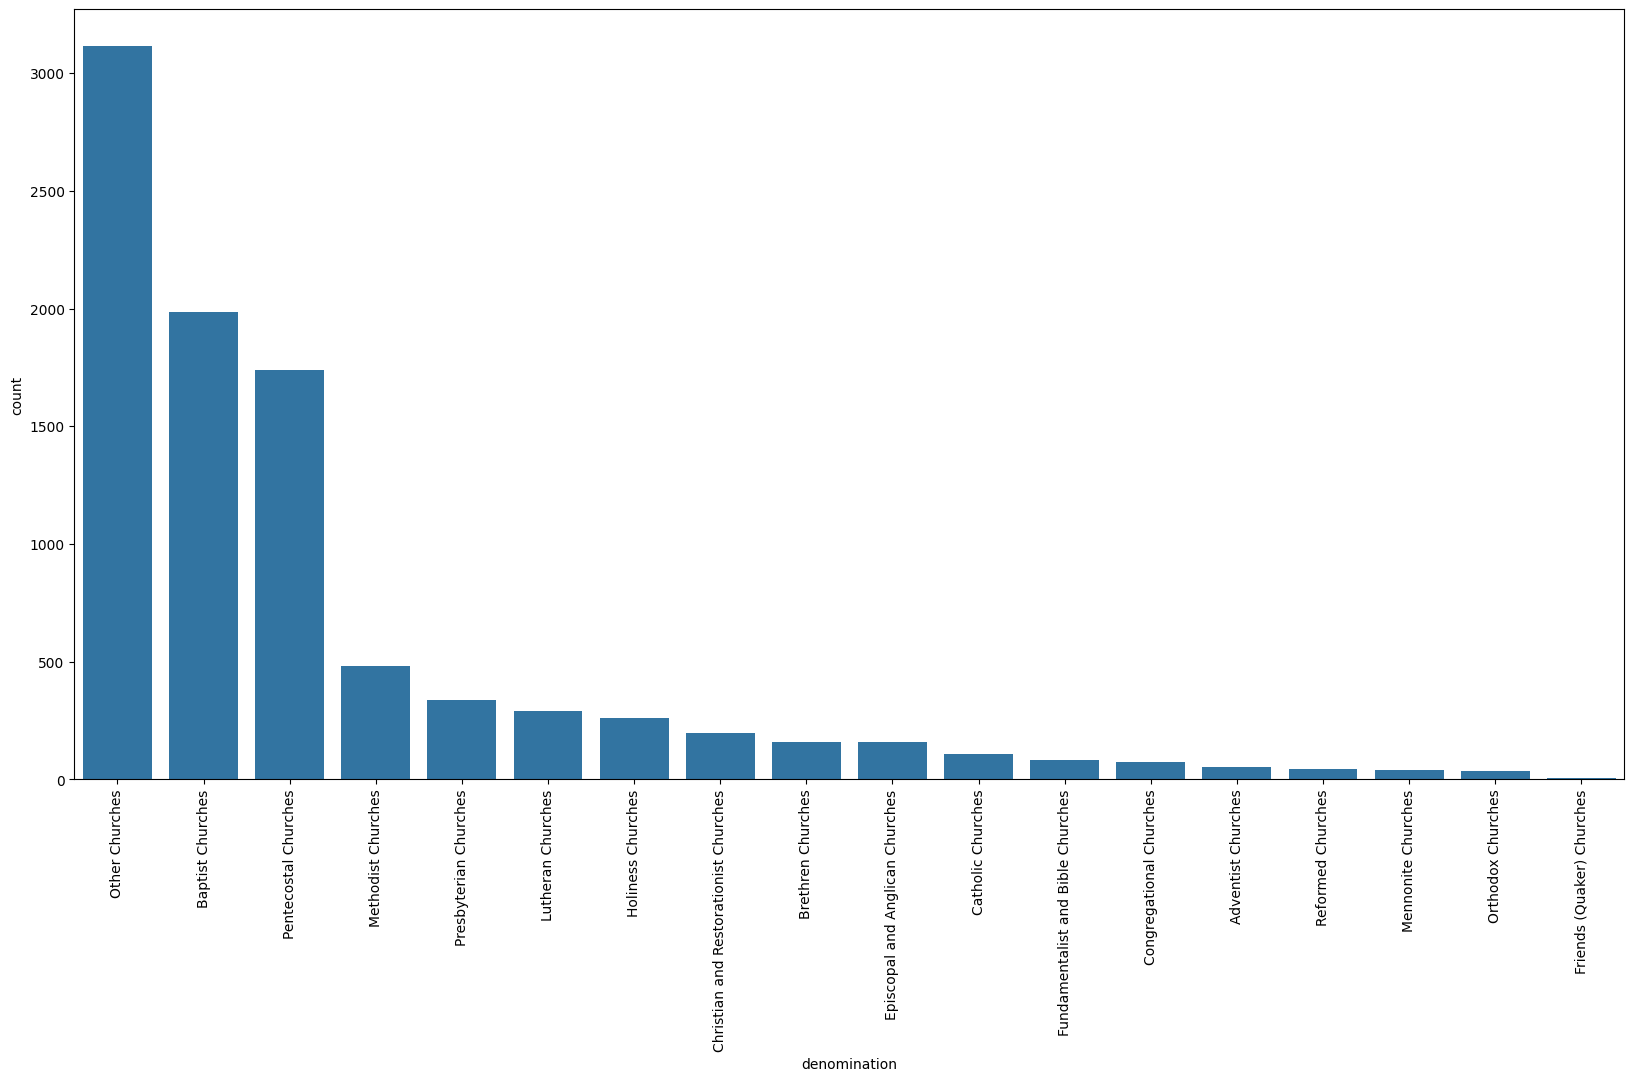

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel('denomination')
plt.ylabel('count')
sns.barplot(data = denom_cnt)


**Classifying Churches using the Model**

In [ ]:
word2vec_model = Word2Vec.load('/content/drive/MyDrive/IIMB/word2vec_church Classification 2')

In [ ]:
growth_words = ['community', 'family', 'congregation', 'join', 'invite', 'reach', 'diversity', 'grow', 'come', 'welcome', 'friendly', 'bring', 'newcomers', 'meet', 'connect', 'volunteers', 'evangelical', 'cultural', 'making_disciples', 'unity', 'missionaries', 'committed_helping', 'christian_fellowship', 'spiritual_growth']

In [ ]:

ideology_words = ['devoted', 'parish', 'service', 'tradition', 'gospel', 'liturgy', 'anglican', 'teaching', 'worship', 'glorify_god', 'spiritual', 'open_hearts', 'bible_believing', 'great_commission', 'help', 'inspired_word', 'one_another', 'transformation_world', 'old_new_testament', 'educate']

In [ ]:
# Creating the vectors for the selected words in each category for later use

growth_vectors = word2vec_model.wv[growth_words]
ideology_vectors = word2vec_model.wv[ideology_words]

In [ ]:

vocab = word2vec_model.wv.index_to_key

**Word2Vec Cosine Similarity Mathod - Upper Bound**

In [ ]:
df['growth_sim_score'] = 0.0
df['ideology_sim_score'] = 0.0
df['Aim'] = 'NaN'

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.drop(['Unnamed: 0'],axis=1)

,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim
0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.0,0.0,NaN
1,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.0,0.0,NaN
2,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.0,0.0,NaN
3,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,0.0,0.0,NaN
4,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
9168,Zoe Christian Center,Additional Info About Our Church This is the ...,Pentecostal Churches,our church this is the ministry of christ jesu...,ministry christ jesus place develop walk chris...,ministry christ jesus place develop walk chris...,0.0,0.0,NaN
9169,Zoe Christian Fellowship,Additional Info About Our Church Countless nu...,Other Churches,our church countless numbers of people have be...,countless numbers people impacted powerful pro...,countless numbers people impacted powerful pro...,0.0,0.0,NaN
9170,Zionsville Presbyterian Church,Additional Info About Our Church Welcome to Z...,Presbyterian Churches,our church welcome to zpc where our focus is s...,welcome zpc focus simple live love jesus help ...,welcome zpc focus simple live love jesus help ...,0.0,0.0,NaN
9171,Zoe Life Christian Center,Additional Info About Our Church We are a min...,Other Churches,our church we are a ministry dedicated to meet...,ministry dedicated meeting needs lost believer...,ministry dedicated meeting needs lost believer...,0.0,0.0,NaN


In [ ]:
for index, row in df.iterrows():
    detail=data_words[index]
    sent = [word for word in detail if word in vocab]
    if len(sent)>0:
        word_vectors = word2vec_model.wv[sent]

        cos_sims_growth = np.max(cosine_similarity(word_vectors, growth_vectors), axis=1)
        cos_sims_ideology = np.max(cosine_similarity(word_vectors, ideology_vectors), axis=1)
        cos_sims_growth.sort()
        cos_sims_ideology.sort()
        mean_sim_growth, mean_sim_ideology = cos_sims_growth[-3:].mean(), cos_sims_ideology[-3:].mean()
        df['growth_sim_score'][index], df['ideology_sim_score'][index] = mean_sim_growth, mean_sim_ideology
        df['Aim'][index] = 'Growth' if mean_sim_growth>mean_sim_ideology else 'Ideology'





Streaming output truncated to the last 5000 lines.
<ipython-input-30-3075cea52af6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['growth_sim_score'][index], df['ideology_sim_score'][index] = mean_sim_growth, mean_sim_ideology
<ipython-input-30-3075cea52af6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aim'][index] = 'Growth' if mean_sim_growth>mean_sim_ideology else 'Ideology'
<ipython-input-30-3075cea52af6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [ ]:
df.head()

,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.870078,0.762164,Growth
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.955365,0.742433,Growth
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.848749,0.897585,Ideology
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.841705,Growth
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.709529,0.748973,Ideology


In [ ]:
df.drop(['Unnamed: 0'],axis=1)

,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim
0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.870078,0.762164,Growth
1,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.955365,0.742433,Growth
2,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.848749,0.897585,Ideology
3,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.841705,Growth
4,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.709529,0.748973,Ideology
...,...,...,...,...,...,...,...,...,...
9168,Zoe Christian Center,Additional Info About Our Church This is the ...,Pentecostal Churches,our church this is the ministry of christ jesu...,ministry christ jesus place develop walk chris...,ministry christ jesus place develop walk chris...,1.000000,0.942316,Growth
9169,Zoe Christian Fellowship,Additional Info About Our Church Countless nu...,Other Churches,our church countless numbers of people have be...,countless numbers people impacted powerful pro...,countless numbers people impacted powerful pro...,0.690745,0.733835,Ideology
9170,Zionsville Presbyterian Church,Additional Info About Our Church Welcome to Z...,Presbyterian Churches,our church welcome to zpc where our focus is s...,welcome zpc focus simple live love jesus help ...,welcome zpc focus simple live love jesus help ...,1.000000,0.739105,Growth
9171,Zoe Life Christian Center,Additional Info About Our Church We are a min...,Other Churches,our church we are a ministry dedicated to meet...,ministry dedicated meeting needs lost believer...,ministry dedicated meeting needs lost believer...,0.909005,0.840280,Growth


In [ ]:
upper_score_classification=df[['name','datials','denomonation','growth_sim_score','ideology_sim_score,'Aim']].copy()

In [ ]:
df.to_csv("/content/drive/MyDrive/IIMB/upper_score_file.csv", index=False)


In [ ]:
df['Aim'].value_counts()

Growth      5378
Ideology    3794
NaN            1
Name: Aim, dtype: int64

In [ ]:
df.head(5)

,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.779120,0.653949,Growth
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.950970,0.705961,Growth
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.835373,0.894218,Ideology
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.822922,Growth
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.717758,0.779543,Ideology


**Lower Bound on Similarity Score**

In [ ]:
df['growth_sim_score_lower'] = 0.0
df['ideology_sim_score_lower'] = 0.0

In [ ]:
# for index, row in df.iterrows():
#     detail=data_words[index]
#     sent = [word for word in detail if word in vocab]
#     if len(sent)>0:
#         word_vectors = word2vec_model.wv[sent]
#         cos_sims_growth = np.max(cosine_similarity(word_vectors, growth_vectors), axis=1)
#         cos_sims_ideology = np.max(cosine_similarity(word_vectors, ideology_vectors), axis=1)
#         cos_sims_growth.sort()
#         cos_sims_ideology.sort()
#         mean_sim_growth, mean_sim_ideology = cos_sims_growth[np.where(cos_sims_growth>0.5)][:6].mean(), cos_sims_ideology[np.where(cos_sims_growth>0.5)][:6].mean()
#         df['growth_sim_score_lower'][index], df['ideology_sim_score_lower'][index] = mean_sim_growth, mean_sim_ideology
for index, row in df.iterrows():
    detail = data_words[index]
    sent = [word for word in detail if word in vocab]

    if len(sent) > 0:
        word_vectors = word2vec_model.wv[sent]
        cos_sims_growth = np.max(cosine_similarity(word_vectors, growth_vectors), axis=1)
        cos_sims_ideology = np.max(cosine_similarity(word_vectors, ideology_vectors), axis=1)

        cos_sims_growth.sort()
        cos_sims_ideology.sort()

        mean_sim_growth = cos_sims_growth[np.where(cos_sims_growth > 0.5)][:6].mean()
        mean_sim_ideology = cos_sims_ideology[np.where(cos_sims_ideology > 0.5)][:6].mean()

        df.at[index, 'growth_sim_score_lower'] = mean_sim_growth
        df.at[index, 'ideology_sim_score_lower'] = mean_sim_ideology





<ipython-input-36-9cad232a3cc4>:25: RuntimeWarning: Mean of empty slice.
  mean_sim_ideology = cos_sims_ideology[np.where(cos_sims_ideology > 0.5)][:6].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-36-9cad232a3cc4>:24: RuntimeWarning: Mean of empty slice.
  mean_sim_growth = cos_sims_growth[np.where(cos_sims_growth > 0.5)][:6].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-36-9cad232a3cc4>:25: RuntimeWarning: Mean of empty slice.
  mean_sim_ideology = cos_sims_ideology[np.where(cos_sims_ideology > 0.5)][:6].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-36-9cad232a3cc4>:25: RuntimeWarning: Mean o

In [ ]:

df.head(19)

,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim,growth_sim_score_lower,ideology_sim_score_lower
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.779120,0.653949,Growth,0.546259,0.541763
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.950970,0.705961,Growth,0.549893,0.528616
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.835373,0.894218,Ideology,0.532410,0.575460
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.822922,Growth,0.576991,0.513976
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.717758,0.779543,Ideology,0.527494,0.528888
5,6,A Servant Church of God of Prophecy,Additional Info About Our Church We are a chu...,Pentecostal Churches,our church we are a church where serving commu...,church serving communities focus winning souls...,church serving communities focus winning souls...,0.707449,0.670204,Growth,0.570293,0.600524
6,7,A Place of Healing - El Siloe,Additional Info About Our Church Our church i...,Pentecostal Churches,our church our church is a lively place of wor...,church lively place worship place entire famil...,church lively place worship place entire famil...,1.000000,1.000000,Growth,0.503126,0.510920
7,8,A Little Faith Ministries,Additional Info About Our Church All are welc...,Other Churches,our church all are welcome mission to help the...,welcome mission help nonchurched area vision s...,welcome mission help nonchurched area vision s...,0.896365,0.875344,Growth,0.602934,0.568137
8,9,A Servant's Heart Fellowship,Additional Info About Our Church We are a gro...,Pentecostal Churches,our church we are a growing church excited abo...,growing church excited winning lost jesus chri...,growing church excited winning lost jesus chri...,0.924555,0.652642,Growth,0.528008,0.547849
9,10,A Word in Season Ministry Center,Additional Info About Our Church We are a Ful...,Other Churches,our church we are a full gospel and outreachfo...,full gospel outreachfocused ministry,full gospel outreachfocused ministry,0.477094,0.646255,Ideology,0.541277,1.000000


**Mean similarity score**

In [ ]:
df['growth_sim_score_avg'] = 0.0
df['ideology_sim_score_avg'] = 0.0
# df['growth_dist_score_avg']=0.0
# df['ideology_dist_score_avg']=0.0

In [ ]:

df.head()

,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim,growth_sim_score_lower,ideology_sim_score_lower,growth_sim_score_avg,ideology_sim_score_avg
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.779120,0.653949,Growth,0.546259,0.541763,0.0,0.0
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.950970,0.705961,Growth,0.549893,0.528616,0.0,0.0
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.835373,0.894218,Ideology,0.532410,0.575460,0.0,0.0
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.822922,Growth,0.576991,0.513976,0.0,0.0
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.717758,0.779543,Ideology,0.527494,0.528888,0.0,0.0


In [ ]:

for index, row in df.iterrows():
    detail=data_words[index]
    sent = [word for word in detail if word in vocab]
    if len(sent)>0:
        word_vectors = word2vec_model.wv[sent]
        cos_sims_growth = np.max(cosine_similarity(word_vectors, growth_vectors), axis=1)
        cos_sims_ideology = np.max(cosine_similarity(word_vectors, ideology_vectors), axis=1)
        mean_sim_growth, mean_sim_ideology = cos_sims_growth.mean(), cos_sims_ideology.mean()
        df['growth_sim_score_avg'][index], df['ideology_sim_score_avg'][index] = mean_sim_growth, mean_sim_ideology

# from sklearn.metrics.pairwise import euclidean_distances

# for index, row in df.iterrows():
#     detail = data_words[index]
#     sent = [word for word in detail if word in vocab]

#     if len(sent) > 0:
#         word_vectors = word2vec_model.wv[sent]
#         euclidean_dist_growth = np.min(euclidean_distances(word_vectors, growth_vectors), axis=1)
#         euclidean_dist_ideology = np.min(euclidean_distances(word_vectors, ideology_vectors), axis=1)

#         # Sort the Euclidean distances and take the top 3 values
#         euclidean_dist_growth_sorted = np.sort(euclidean_dist_growth)[:6]
#         euclidean_dist_ideology_sorted = np.sort(euclidean_dist_ideology)[:6]

#         mean_dist_growth = euclidean_dist_growth_sorted.mean()
#         mean_dist_ideology = euclidean_dist_ideology_sorted.mean()

#         df.at[index, 'growth_dist_score_top3'] = mean_dist_growth
#         df.at[index, 'ideology_dist_score_top3'] = mean_dist_ideology


Streaming output truncated to the last 5000 lines.
<ipython-input-40-6c682653c5c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['growth_sim_score_avg'][index], df['ideology_sim_score_avg'][index] = mean_sim_growth, mean_sim_ideology
<ipython-input-40-6c682653c5c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['growth_sim_score_avg'][index], df['ideology_sim_score_avg'][index] = mean_sim_growth, mean_sim_ideology
<ipython-input-40-6c682653c5c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
df.head()


,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim,growth_sim_score_lower,ideology_sim_score_lower,growth_sim_score_avg,ideology_sim_score_avg
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.779120,0.653949,Growth,0.546259,0.541763,0.581744,0.505828
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.950970,0.705961,Growth,0.549893,0.528616,0.587699,0.493595
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.835373,0.894218,Ideology,0.532410,0.575460,0.582647,0.621695
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.822922,Growth,0.576991,0.513976,0.647695,0.556164
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.717758,0.779543,Ideology,0.527494,0.528888,0.558933,0.569392


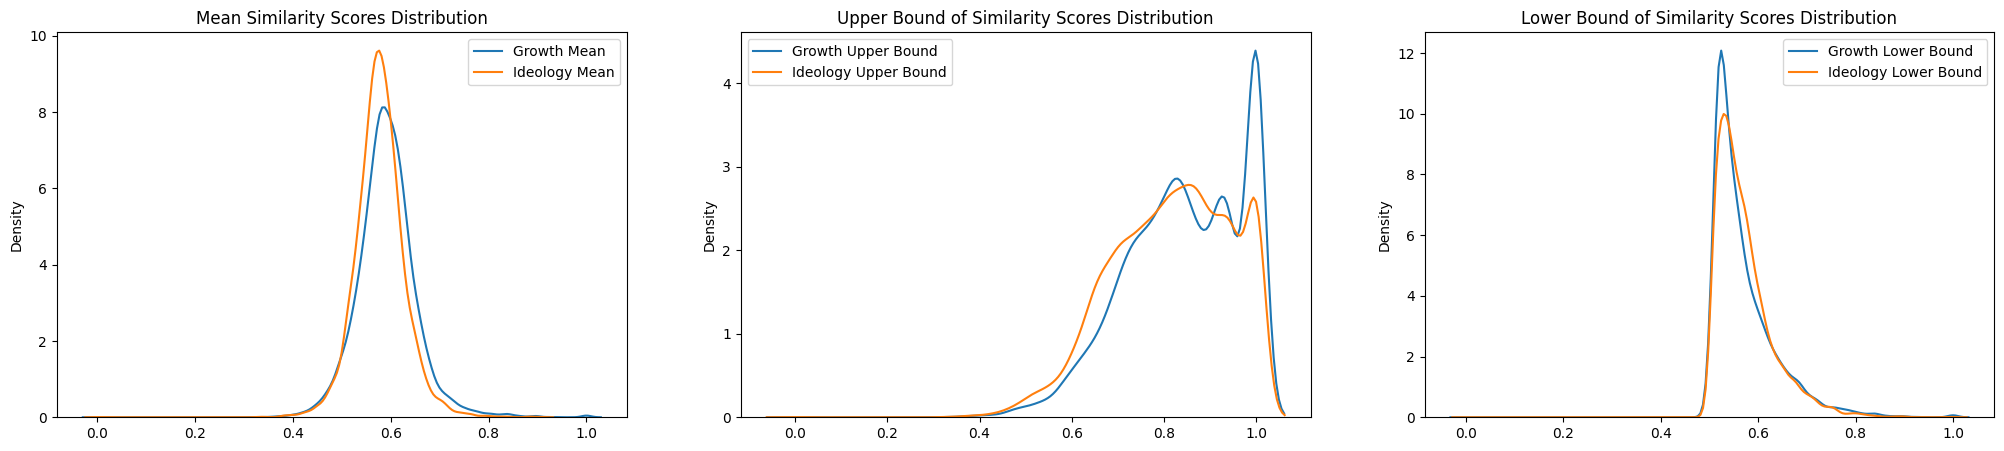

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.title('Mean Similarity Scores Distribution')
sns.kdeplot(df['growth_sim_score_avg'].values)
sns.kdeplot(df['ideology_sim_score_avg'].values)
plt.legend(['Growth Mean','Ideology Mean'])
plt.subplot(132)
plt.title('Upper Bound of Similarity Scores Distribution')
sns.kdeplot(df['growth_sim_score'].values)
sns.kdeplot(df['ideology_sim_score'].values)
plt.legend(['Growth Upper Bound','Ideology Upper Bound'])
plt.subplot(133)
plt.title('Lower Bound of Similarity Scores Distribution')
sns.kdeplot(df['growth_sim_score_lower'].values)
sns.kdeplot(df['ideology_sim_score_lower'].values)
plt.legend(['Growth Lower Bound','Ideology Lower Bound'])

**Word2Vec Overlap Metric Method**

In [ ]:
df['growth_sim_overlap'] = 0.0
df['ideology_sim_overlap'] = 0.0

In [ ]:
growth_len = len(growth_words)
ideology_len = len(ideology_words)

for index, row in df.iterrows():
    detail=data_words[index]
    growth_overlap, ideology_overlap = 0, 0
    sent = []
    for word in detail:
        if word in growth_words:
            growth_overlap+=1
        elif word in ideology_words:
            ideology_overlap+=1
        else:
            sent.append(word)
    sent = [word for word in sent if word in vocab]
    if len(sent)>0:
        word_vectors = word2vec_model.wv[sent]
        cos_sims_growth = np.max(cosine_similarity(word_vectors, growth_vectors), axis=1)
        cos_sims_ideology = np.max(cosine_similarity(word_vectors, ideology_vectors), axis=1)
        growth_overlap+= len(np.where(cos_sims_growth>0.7))
        ideology_overlap+=len(np.where(cos_sims_ideology>0.7))
    # print(mean_sim_growth, mean_sim_ideology)
    Dr_g, Dr_i = min(len(detail), len(np.where(cos_sims_growth>0.7))+growth_len), min(len(detail), len(np.where(cos_sims_ideology>0.7))+ideology_len)
    df['growth_sim_overlap'][index], df['ideology_sim_overlap'][index] = growth_overlap/Dr_g, ideology_overlap/Dr_i



Streaming output truncated to the last 5000 lines.
<ipython-input-44-f7d28bfe4b5d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['growth_sim_overlap'][index], df['ideology_sim_overlap'][index] = growth_overlap/Dr_g, ideology_overlap/Dr_i
<ipython-input-44-f7d28bfe4b5d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['growth_sim_overlap'][index], df['ideology_sim_overlap'][index] = growth_overlap/Dr_g, ideology_overlap/Dr_i
<ipython-input-44-f7d28bfe4b5d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [ ]:
df.head()

,Unnamed: 0,name,details,denomination,tidy_details,tidy_details_no_stop,lem_tidy_details_no_stop,growth_sim_score,ideology_sim_score,Aim,growth_sim_score_lower,ideology_sim_score_lower,growth_sim_score_avg,ideology_sim_score_avg,growth_sim_overlap,ideology_sim_overlap
0,0,A Chosen Generation Outreach Ministries,Additional Info About Our Church We are a loc...,Other Churches,our church we are a local pensacola church and...,local pensacola church youth group comprised a...,local pensacola church youth group comprised a...,0.779120,0.653949,Growth,0.546259,0.541763,0.581744,0.505828,0.04,0.047619
1,2,A Fresh Wind Church,Additional Info About Our Church A Fresh Wind...,Baptist Churches,our church a fresh wind church located in elyr...,fresh wind church located elyria ohio exists l...,fresh wind church located elyria ohio exists l...,0.950970,0.705961,Growth,0.549893,0.528616,0.587699,0.493595,0.12,0.047619
2,3,A God Send Ministries,Additional Info About Our Church A God Send M...,Other Churches,our church a god send ministries inc agsm is a...,god send ministries inc agsm spiritual develop...,god send ministries inc agsm spiritual develop...,0.835373,0.894218,Ideology,0.532410,0.575460,0.582647,0.621695,0.08,0.095238
3,4,A New Song Christian Fellowship,Additional Info About Our Church We are a spi...,Pentecostal Churches,our church we are a spirit filled congregation...,spirit filled congregation much room grow chur...,spirit filled congregation much room grow chur...,1.000000,0.822922,Growth,0.576991,0.513976,0.647695,0.556164,0.20,0.095238
4,5,A More Excellent Way Church,Additional Info About Our Church Our Mailing ...,Other Churches,our church our mailing address po box blythewo...,mailing address po box blythewood sc mission p...,mailing address po box blythewood sc mission p...,0.717758,0.779543,Ideology,0.527494,0.528888,0.558933,0.569392,0.04,0.047619


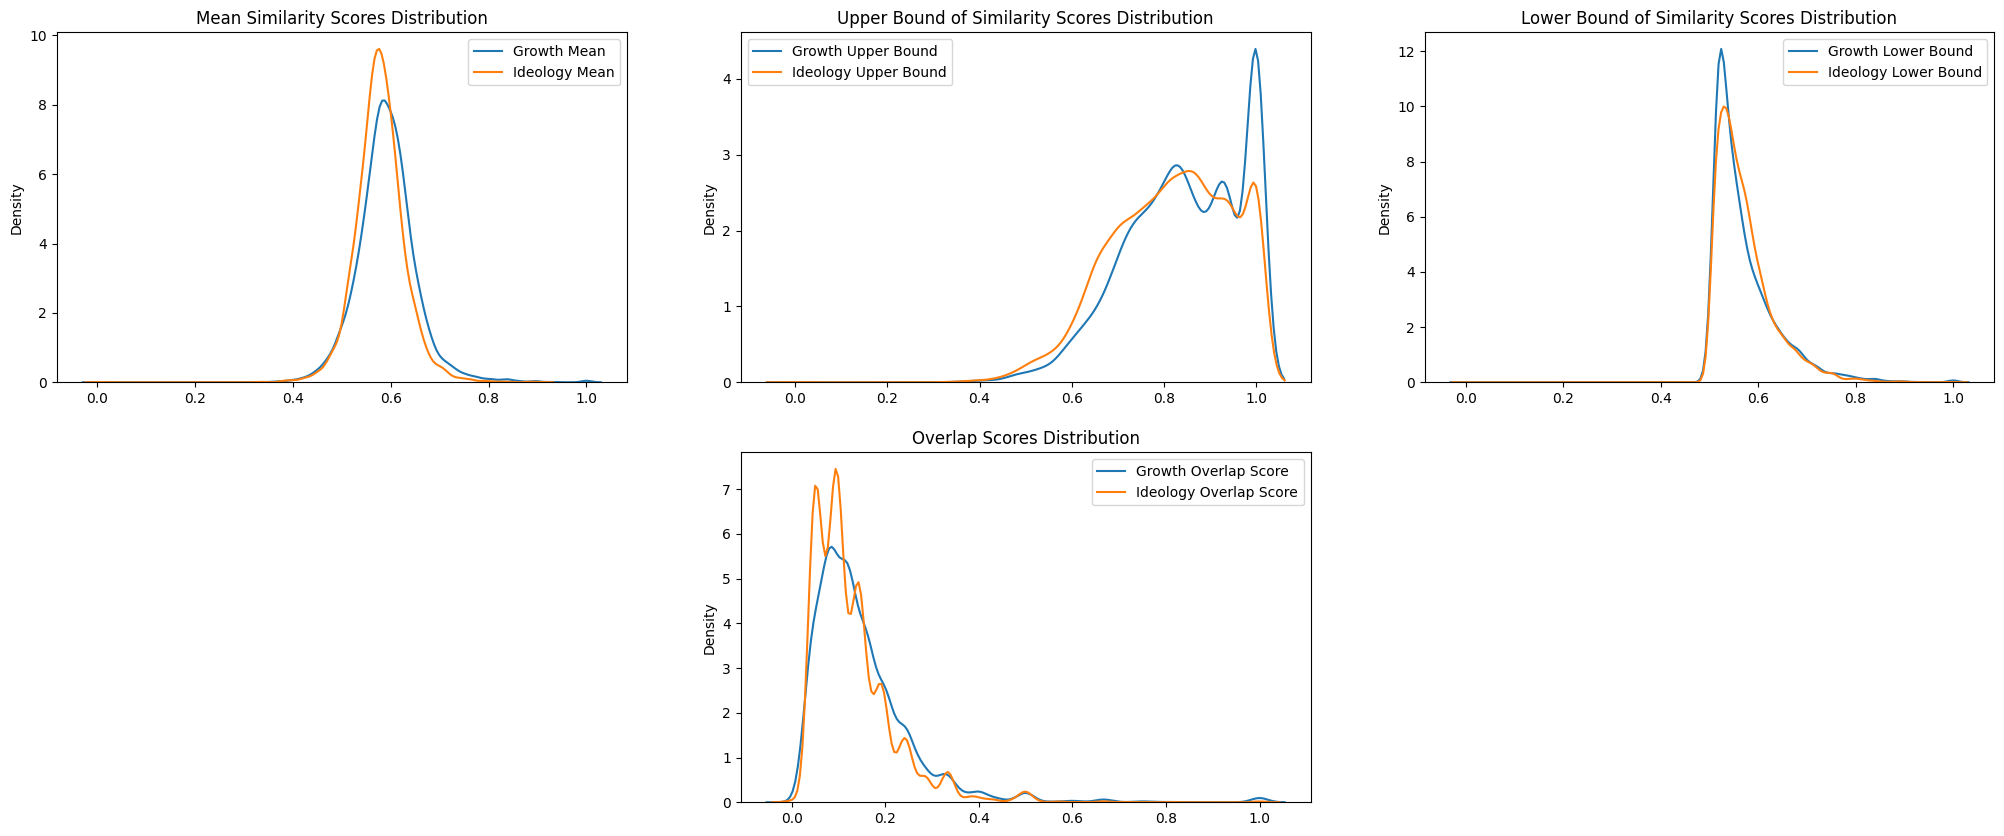

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(231)
plt.title('Mean Similarity Scores Distribution')
sns.kdeplot(df['growth_sim_score_avg'].values)
sns.kdeplot(df['ideology_sim_score_avg'].values)
plt.legend(['Growth Mean','Ideology Mean'])
plt.subplot(232)
plt.title('Upper Bound of Similarity Scores Distribution')
sns.kdeplot(df['growth_sim_score'].values)
sns.kdeplot(df['ideology_sim_score'].values)
plt.legend(['Growth Upper Bound','Ideology Upper Bound'])
plt.subplot(233)
plt.title('Lower Bound of Similarity Scores Distribution')
sns.kdeplot(df['growth_sim_score_lower'].values)
sns.kdeplot(df['ideology_sim_score_lower'].values)
plt.legend(['Growth Lower Bound','Ideology Lower Bound'])
plt.subplot(235)
plt.title('Overlap Scores Distribution')
sns.kdeplot(df['growth_sim_overlap'].values)
sns.kdeplot(df['ideology_sim_overlap'].values)
plt.legend(['Growth Overlap Score','Ideology Overlap Score'])

In [ ]:
len(np.where(df['growth_sim_score_lower']>df['ideology_sim_score_lower'])[0])/(len(df))*100

45.59031941567644

In [ ]:
len(np.where(df['growth_sim_score']>df['ideology_sim_score'])[0])/(len(df))*100

58.628583887495914

In [ ]:
len(np.where(df['growth_sim_score_avg']>df['ideology_sim_score_avg'])[0])/(len(df))*100

57.74555761473891

In [ ]:
len(np.where(df['growth_sim_overlap']>df['ideology_sim_overlap'])[0])/(len(df))*100

44.205821432464845

**Visualization of distribution of words with or without threshold**

In [ ]:
#os.makedirs('/content/drive/MyDrive/IIMB/sent_length_visualization')

In [ ]:
lengths_wo_thres, lengths_w_thres = [], []
for index, row in df.iterrows():
    detail=data_words[index]
    sent = [word for word in detail if word in vocab]
    if len(sent)>0:
        word_vectors = word2vec_model.wv[sent]
        cos_sims_growth = np.any(cosine_similarity(word_vectors, growth_vectors)>0.5, axis=1).sum()
        cos_sims_ideology = np.any(cosine_similarity(word_vectors, ideology_vectors)>0.5, axis=1).sum()

        lengths_wo_thres.append(len(sent))
        lengths_w_thres.append(max(cos_sims_growth, cos_sims_ideology))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IIMB/sent_length_visualization/thres0.5.jpg'

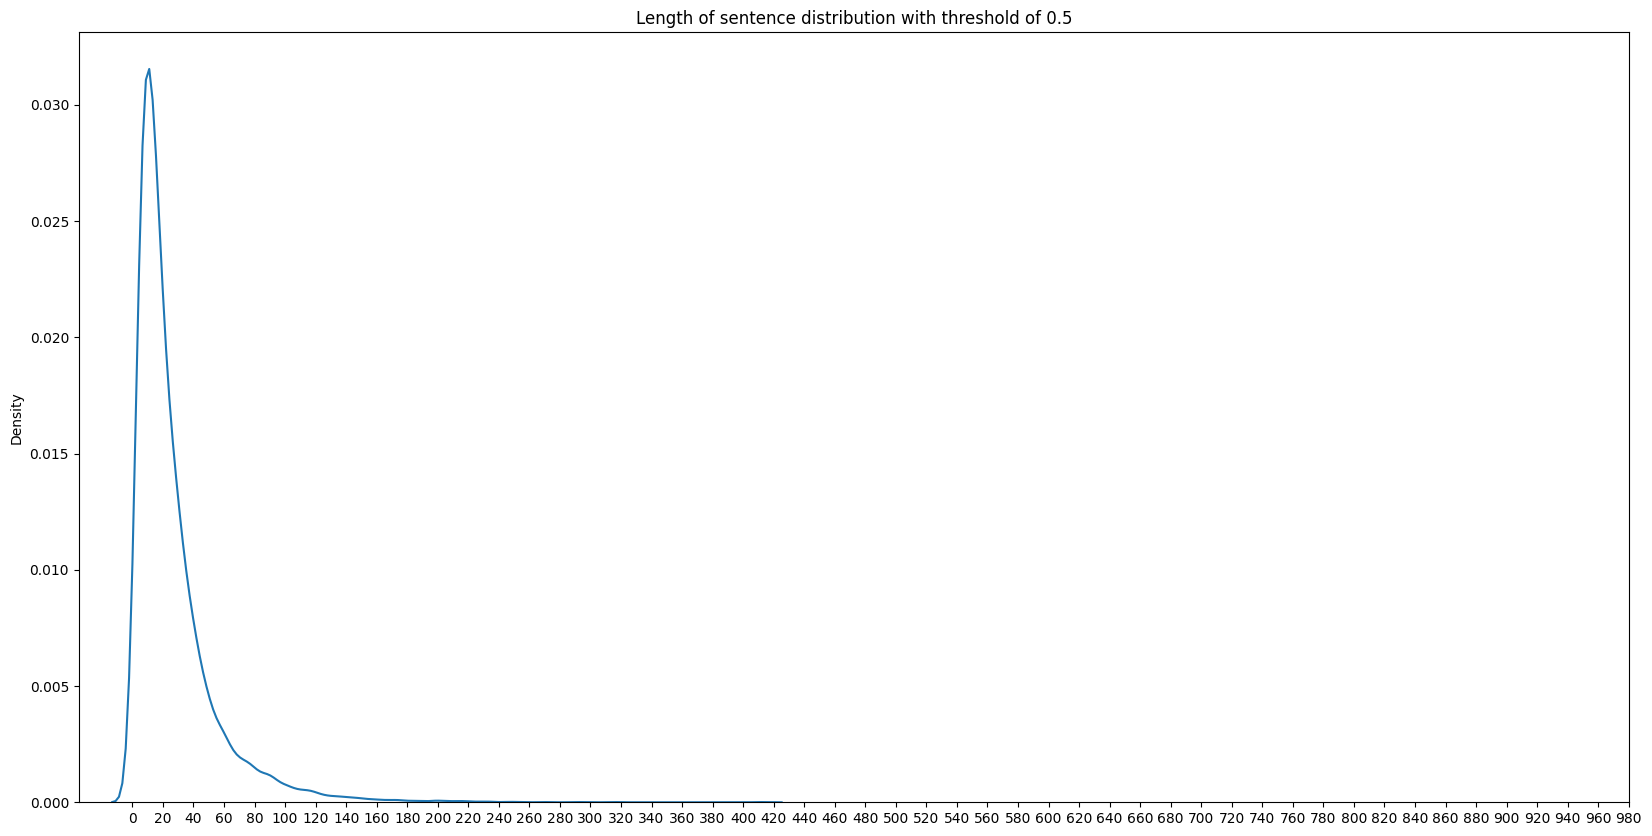

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Length of sentence distribution with threshold of 0.5')
x = sns.kdeplot(lengths_w_thres)
x.set_xticks([x for x in range(0, 1000, 20)])
plt.savefig('/content/drive/MyDrive/IIMB/sent_length_visualization/thres0.5.jpg')

In [ ]:
lengths_w_thres2, lengths_w_thres3, lengths_w_thres4 = [], [], []
for index, row in df.iterrows():
    detail=data_words[index]
    sent = [word for word in detail if word in vocab]
    if len(sent)>0:
        word_vectors = word2vec_model.wv[sent]
        cos_sims_growth = np.any(cosine_similarity(word_vectors, growth_vectors)>0.6, axis=1).sum()
        cos_sims_ideology = np.any(cosine_similarity(word_vectors, ideology_vectors)>0.6, axis=1).sum()
        lengths_w_thres2.append(max(cos_sims_growth, cos_sims_ideology))

        cos_sims_growth = np.any(cosine_similarity(word_vectors, growth_vectors)>0.7, axis=1).sum()
        cos_sims_ideology = np.any(cosine_similarity(word_vectors, ideology_vectors)>0.7, axis=1).sum()
        lengths_w_thres3.append(max(cos_sims_growth, cos_sims_ideology))

        cos_sims_growth = np.any(cosine_similarity(word_vectors, growth_vectors)>0.8, axis=1).sum()
        cos_sims_ideology = np.any(cosine_similarity(word_vectors, ideology_vectors)>0.8, axis=1).sum()
        lengths_w_thres4.append(max(cos_sims_growth, cos_sims_ideology))

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Length of sentence distribution with threshold of 0.6')
x = sns.kdeplot(lengths_w_thres2)
x.set_xticks([x for x in range(0, 1000, 20)])
plt.savefig('/content/drive/MyDrive/IIMB/sent_length_visualization/thres0.6.jpg')

plt.figure(figsize=(20, 10))
plt.title('Length of sentence distribution with threshold of 0.7')
x = sns.kdeplot(lengths_w_thres3)
x.set_xticks([x for x in range(0, 1000, 20)])
plt.savefig('/content/drive/MyDrive/IIMB/sent_length_visualization/thres0.7.jpg')

plt.figure(figsize=(20, 10))
plt.title('Length of sentence distribution with threshold of 0.8')
x = sns.kdeplot(lengths_w_thres4)
x.set_xticks([x for x in range(0, 1000, 20)])
plt.savefig('/content/drive/MyDrive/IIMB/sent_length_visualization/thres0.8.jpg')

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Length of sentence distribution without threshold')
x = sns.kdeplot(lengths_wo_thres)
x.set_xticks([x for x in range(0, 1000, 20)])
plt.savefig('/content/drive/MyDrive/IIMB/sent_length_visualization/no_thresjpg')